<a href="https://colab.research.google.com/github/mlaricobar/solution-datathon-interbank-2020/blob/desarrollo/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%cd /gdrive/'My Drive'/Competencias/'[02] Interbank-2020'

/gdrive/My Drive/Competencias/[02] Interbank-2020


In [6]:
!ls -lh '[01] Intermediate'

total 2.0G
-rw------- 1 root root 521M Dec 31 22:53 ds_rcc.csv
-rw------- 1 root root 185M Dec 18 16:51 ds_rcc_instit.csv
-rw------- 1 root root 204M Dec 18 16:51 ds_rcc_instit_test.csv
-rw------- 1 root root 576M Dec 31 22:55 ds_rcc_test.csv
-rw------- 1 root root  22M Dec 31 22:28 ds_se.csv
-rw------- 1 root root  24M Dec 31 22:28 ds_se_test.csv
-rw------- 1 root root  18M Dec 31 19:34 ds_sunat.csv
-rw------- 1 root root  20M Dec 31 19:34 ds_sunat_test.csv
-rw------- 1 root root 192M Dec 31 13:48 rcc_product_level.csv
-rw------- 1 root root 212M Dec 31 17:27 rcc_product_level_test.csv


In [7]:
def optimizar_df(df):
  for col_ in df.select_dtypes(include=[int]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="unsigned")

  for col_ in df.select_dtypes(include=[float]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="float")
  
  return df

In [81]:
df_base_train = optimizar_df(pd.read_csv("[00] Data/y_train.csv"))
df_base_test = optimizar_df(pd.read_csv("[00] Data/sample_submission.csv"))

In [82]:
df_se = optimizar_df(pd.read_csv('[01] Intermediate/ds_se.csv'))
df_se_test = optimizar_df(pd.read_csv('[01] Intermediate/ds_se_test.csv'))

In [83]:
df_base_train = df_base_train.merge(df_se, how="left", on="key_value")
df_base_test = df_base_test.merge(df_se_test, how="left", on="key_value")

In [66]:
round(df_base_train[["edad"]].describe(), 3)

,edad
count,354663.000
mean,0.000
std,1.000
min,-2.423
25%,-0.832
50%,-0.151
75%,0.683
max,5.303


In [79]:
round(df_base_train[["edad"]].describe(), 3)

,edad
count,358487.000
mean,0.000
std,1.000
min,-2.434
25%,-0.835
50%,-0.150
75%,0.688
max,5.332


In [67]:
round(df_base_test[["edad"]].describe(), 3)

,edad
count,386975.000
mean,-0.055
std,1.003
min,-2.120
25%,-0.908
50%,-0.226
75%,0.607
max,4.242


In [80]:
round(df_base_test[["edad"]].describe(), 3)

,edad
count,396666.000
mean,0.000
std,1.000
min,-2.078
25%,-0.779
50%,-0.168
75%,0.672
max,4.339


In [16]:
from scipy import stats

In [90]:
u_statistic, p_value = stats.mannwhitneyu(df_base_train.loc[pd.notnull(df_base_train["edad"]), "edad"], df_base_train.loc[pd.notnull(df_base_train["edad"]), "edad"])
print(u_statistic, round(p_value, 3))

62892921784.5 0.5


In [91]:
u_statistic, p_value = stats.mannwhitneyu(df_base_test.loc[pd.notnull(df_base_test["edad"]), "edad"], df_base_test.loc[pd.notnull(df_base_test["edad"]), "edad"])
print(u_statistic, round(p_value, 3))

74874825312.5 0.5


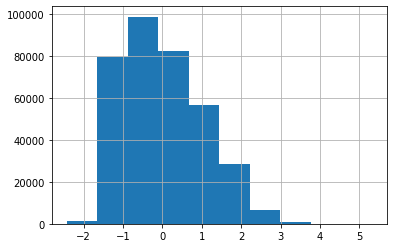

In [86]:
df_base_train["edad"].hist()

In [71]:
import matplotlib.pyplot as plt

def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    """
    This function generates a histogram.
    Args:
        dataframe:
        column_name: String. Name of the column whose distribution we
        want to visualize.
        title: String. Title of the histogram.
        x_axis_label: String. X-axis label.
        y_axis_label: String. Y-axis label.
    Outputs:
        Histogram containing distribution for specific column column_name.
    """
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.legend(loc='upper right')

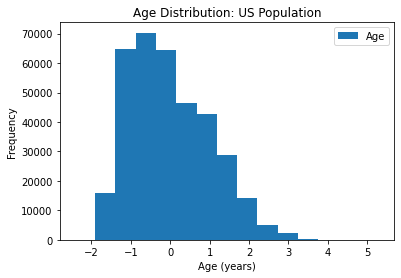

In [72]:
#### MAIN FUNCTION ####
generate_distribution_histogram(df_base_train, 'edad',
                                title = 'Age Distribution: US Population',
                                x_axis_label = 'Age (years)',
                                y_axis_label = 'Frequency',
                                label_name = 'Age')

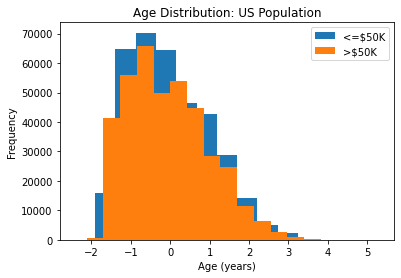

In [73]:
generate_distribution_histogram(df_base_train, 'edad',
                                title = 'Age Distribution: US Population',
                                x_axis_label = 'Age (years)',
                                y_axis_label = 'Frequency',
                                label_name = '<=$50K')

generate_distribution_histogram(df_base_test, 'edad',
                                title = 'Age Distribution: US Population',
                                x_axis_label = 'Age (years)',
                                y_axis_label = 'Frequency',
                                label_name = '>$50K')

In [74]:
df_base_train["edad"] = df_base_train["edad"].fillna(df_base_train["edad"].median())
df_base_test["edad"] = df_base_test["edad"].fillna(df_base_test["edad"].median())

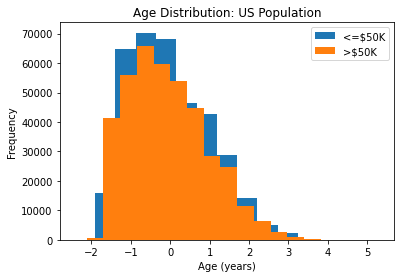

In [75]:
generate_distribution_histogram(df_base_train, 'edad',
                                title = 'Age Distribution: US Population',
                                x_axis_label = 'Age (years)',
                                y_axis_label = 'Frequency',
                                label_name = '<=$50K')

generate_distribution_histogram(df_base_test, 'edad',
                                title = 'Age Distribution: US Population',
                                x_axis_label = 'Age (years)',
                                y_axis_label = 'Frequency',
                                label_name = '>$50K')

In [31]:
print(round(df_base_train["edad"].isnull().sum() / df_base_train.shape[0], 3))
print(round(df_base_test["edad"].isnull().sum() / df_base_test.shape[0], 3))

0.011
0.024


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
df_base_train["edad"] = scaler.fit_transform(df_base_train[["edad"]])

In [78]:
scaler = StandardScaler()
df_base_test["edad"] = scaler.fit_transform(df_base_test[["edad"]])